# End to End Project: Real Estate Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

%matplotlib inline


In [2]:
#we start on creating dataframes

df1=pd.read_csv('Excels/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
#here, we see count of each unique 'area_type'

df1.groupby('area_type')['area_type'].agg('count')  

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#below features are not required for predicting prices

df2 =df1.drop([ 'availability', 'society'], axis=1)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
#we start with cleaning, handling NA values

df2.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [8]:
#we replace NA of balcony with mean of balcony
import math

bal_mean= math.ceil(df2.balcony.mean())

In [9]:
df2.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [10]:
df2['balcony']=df2['balcony'].fillna(bal_mean)


In [11]:
df2.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [12]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [13]:
#we drop the remaining NA values
df2= df2.dropna()

In [14]:
df2.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [17]:
df2['size'].unique()  #here, we see there are words like 'BHK', 'Bedroon'

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
#now, we separate the word using space and take 1st token(2,3,4) and store in new column

df2['bhk'] = df2['size'].apply(lambda x: x.split(' ')[0])


In [19]:
df2['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [20]:
df2.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,6.0,2.0,370.00,6


In [21]:
df2=df2.drop('size', axis=1)
df2.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [22]:
df2['bhk'].unique() #as we see there are some outliers, i.e 43,27 bhk

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [23]:
df2['bhk']=df2.bhk.astype(int)  #we convert the 'bhk' column from ojbect to integer

In [24]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [25]:
df2[df2.bhk>10]

,area_type,location,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,1 Giri Nagar,5000,9.0,3.0,360.0,11
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,0.0,230.0,27
1768,Plot Area,1 Ramamurthy Nagar,1200,11.0,0.0,170.0,11
3379,Super built-up Area,1Hanuman Nagar,2000,16.0,2.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,10000,16.0,2.0,550.0,16
3853,Plot Area,1 Annasandrapalya,1200,6.0,3.0,150.0,11
4684,Plot Area,Munnekollal,2400,40.0,0.0,660.0,43
4916,Super built-up Area,1Channasandra,1250,15.0,0.0,125.0,14
6533,Plot Area,Mysore Road,2232,6.0,2.0,300.0,12
7979,Super built-up Area,1 Immadihalli,6000,12.0,2.0,150.0,11


In [26]:
df2.total_sqft.unique()  #as we see, there is a range in between the values. we need to convert it into single number

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
#now we check for range values using 'try and except'

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df2[~df2.total_sqft.apply(is_float)]   #we use negate '~' to give range

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [29]:
#now we convert this range into float by taking average

def convert_float(x):
    token = x.split('-')
    if len(token)==2:
            return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None


In [30]:
convert_float('2 qsmtr')

In [31]:
df3=df2.copy()

In [32]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_float)
df3.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [33]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [34]:
#now, we do some feature engineering in order to remove outliers

df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']

df3.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [35]:
len(df3.location.unique())  

1304

#here, there are 1300 unique values for 'location' and if we convert to dummies,  it will increase the datasize and its dimensions
#hence, we do some dimentionality reduction

In [36]:
df3.location = df3.location.apply(lambda x: x.strip())  #we remove start and end spaces

In [37]:
location_stat = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)

location_stat  #as, we see there are too may location appeared only once, so we replace such values by 'other'

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [38]:
len(location_stat[location_stat < 10])  

1039

In [39]:
location_less_10= location_stat[location_stat < 10]

location_less_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [40]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [41]:
len(df3.location.unique())

255

In [42]:
df3.head(20)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,other,1020.0,6.0,2.0,370.00,6,36274.509804


Outlier Removal

In [43]:
#As per domain knowledge, we conclude that any room cannot be less than 300 sqft.


df3[df3.total_sqft/df3.bhk <300]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Plot Area,other,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [44]:
#as, we see there are 750 row approx with this mismatch, which are basically outliers

df3.shape

(13246, 8)

In [45]:
df4 = df3[~(df3.total_sqft/df3.bhk <300)]  #we use negate function '~' to remove the outliers

In [46]:
df4.shape

(12502, 8)

In [47]:
#now we check price_per_sqft to check any outliers

df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [48]:
#here, we see the min and max prices are the outliers, hence we create a function which group by location and then sort by
#its standard deviation



def remove_pps_outlier(df):
    df_out=pd.DataFrame()  #create new empty Dataframe
     
    for key, subdf in df.groupby('location'):  
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[(subdf.price_per_sqft> (m-std))  & (subdf.price_per_sqft <= (m+std))]
        
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
        
    return df_out

In [49]:
df5 = remove_pps_outlier(df4)
df5.shape

(10222, 8)

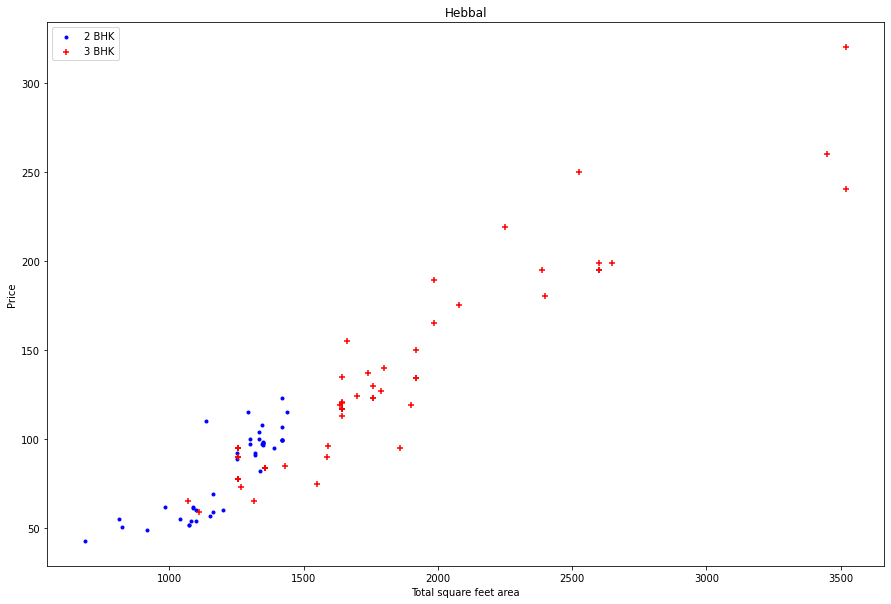

In [50]:
#as we observe in csv that, for approx same sqft area, 2bhk flats are expensive than 3bhk. hence, we consider those as outliers

def plot_scatter(df, location):
    bhk2= df[(df.location == location)& (df.bhk ==2)]
    bhk3= df[(df.location == location)& (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10) #give the bigsize for neat display
    plt.xlabel('Total square feet area')
    plt.ylabel("Price")
    plt.title(location)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', marker = '.', label='2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, color='red', marker = '+', label='3 BHK')
   
    plt.legend()
    
    
plot_scatter(df5, 'Hebbal')

In [51]:
#now, we remove such outliers which are having same sqft, but the higher bhk price value < lower bhk price value

def remove_bhk_oulier(df):
    exclude = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude = np.append(exclude, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude, axis='index')


df6= remove_bhk_oulier(df5)
df6.shape

(7369, 8)

In [52]:
df5.shape

(10222, 8)

In [53]:
#also, in some cases we see that bathrooms is higher than bhk

df6[df6.bath>10]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,Plot Area,BTM 1st Stage,3300.0,14.0,2.0,500.0,9,15151.515152
5344,Super built-up Area,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8547,Super built-up Area,other,12000.0,12.0,2.0,525.0,10,4375.000000
8633,Super built-up Area,other,10000.0,16.0,2.0,550.0,16,5500.000000
9329,Super built-up Area,other,6000.0,12.0,2.0,150.0,11,2500.000000
9642,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [54]:
df6[df6.bath>df6.bhk+2]  #these are the outliers

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,Plot Area,BTM 1st Stage,3300.0,14.0,2.0,500.0,9,15151.515152
1642,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5305,Built-up Area,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6792,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8476,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [55]:
df7=df6[df6.bath<df6.bhk+2]

df7.shape

(7291, 8)

In [56]:
df7= df7.drop('area_type', axis=1)  #we drop bcoz we created this for feature engineering
df7.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [57]:
#now, we convert location to dummies

dummies=pd.get_dummies(df7.location)

In [58]:
df8 = pd.concat([df7, dummies.drop('other', axis=1)], axis=1)

df8.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df8=df8.drop('price_per_sqft', axis=1)
df8.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df9=df8.drop('location', axis=1)
df9.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df9.shape

(7291, 259)

In [63]:
x=df9.drop('price', axis=1)  #independent variable
x.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y=df9.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score



In [67]:
cv = ShuffleSplit(n_splits= 5, test_size= 0.2)

In [68]:
cross_val_score(LinearRegression(), x,y, cv=cv)

array([0.84060232, 0.79517008, 0.83793581, 0.77296948, 0.89348346])

In [69]:
#we will check with other parameters

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor



In [74]:


def best_parameters(x,y):
    
    model_params = {
        'linear regression': {
            'model': LinearRegression(),
            'params' : {
                'normalize': [True, False]
                
            }  
        },
        'lasso': {
            'model': Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse','friedman_mse'],
            'splitter' : ['best', 'random']
            }
        }
    }
    scores = []

    cv = ShuffleSplit(n_splits= 5, test_size= 0.2)
    for model_name, mp in model_params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        clf.fit(x,y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [75]:
best_parameters(x,y)

,model,best_score,best_params
0,linear regression,0.814575,{'normalize': False}
1,lasso,0.702766,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.707089,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [76]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=258)

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [79]:
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8406138341059295

In [84]:
def predictprice(location, sqft, bath, bhk):
    
    loc_index= np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    
    X[0]= sqft
    X[1]=bath
    X[2]=bhk
    
    if loc_index >=0:
        X[loc_index] =1
        
    return lr.predict([X])[0]

In [85]:
predictprice('Vijayanagar', 1200, 3, 3)

86.36345829425186

In [86]:
predictprice('Indira Nagar', 1000, 2, 2)

207.85360896441634

In [87]:
predictprice('Indira Nagar', 1000, 3, 3)

215.38470804141008